In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

In [5]:
df = pd.read_csv("lightening strikes dataset.csv")

In [6]:
df.head(10)

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)
5,2018-01-03,119,POINT(-78 28)
6,2018-01-03,35,POINT(-79.3 28)
7,2018-01-03,60,POINT(-79.1 28)
8,2018-01-03,41,POINT(-78.7 28)
9,2018-01-03,119,POINT(-78.6 28)


In [7]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df.shape

(3401012, 3)

In [10]:
df.drop_duplicates().shape

(3401012, 3)

As show above no duplicate rows in the dataframe. 

In [11]:
df.sort_values(by = 'number_of_strikes', ascending= False).head(10)

,date,number_of_strikes,center_point_geom
302758,2018-08-20,2211,POINT(-92.5 35.5)
278383,2018-08-16,2142,POINT(-96.1 36.1)
280830,2018-08-17,2061,POINT(-90.2 36.1)
280453,2018-08-17,2031,POINT(-89.9 35.9)
278382,2018-08-16,1902,POINT(-96.2 36.1)
11517,2018-02-10,1899,POINT(-95.5 28.1)
277506,2018-08-16,1878,POINT(-89.7 31.5)
24906,2018-02-25,1833,POINT(-98.7 28.9)
284320,2018-08-17,1767,POINT(-90.1 36)
24825,2018-02-25,1741,POINT(-98 29)


So we have ordered it by the number of strikes just to see where that takes us. 
But now we have another question avenue to explore, perhaps we could look to check what position most of the strikes happen in. 

In [13]:
df.center_point_geom.value_counts()

center_point_geom
POINT(-81.5 22.5)     108
POINT(-84.1 22.4)     108
POINT(-82.7 22.9)     107
POINT(-82.5 22.9)     107
POINT(-84.2 22.3)     106
                     ... 
POINT(-130.2 47.4)      1
POINT(-67.5 41.7)       1
POINT(-60.2 44.1)       1
POINT(-117.8 34.6)      1
POINT(-60.4 44.5)       1
Name: count, Length: 170855, dtype: int64

POINT(-81.5 22.5)     
POINT(-84.1 22.4)     
These two point having the most activity. 

In [17]:
df_reoccur = df.center_point_geom.value_counts()[:40].rename_axis('unique_values').reset_index(name='counts').style.background_gradient()
df_reoccur

,unique_values,counts
0,POINT(-81.5 22.5),108
1,POINT(-84.1 22.4),108
2,POINT(-82.7 22.9),107
3,POINT(-82.5 22.9),107
4,POINT(-84.2 22.3),106
5,POINT(-82.5 22.8),106
6,POINT(-76 20.5),105
7,POINT(-75.9 20.4),105
8,POINT(-82.2 22.9),104
9,POINT(-78 18.2),104


Now we know all of the locations with the most lightening strike, the top 40 locations that is. With this course's guidance, i have learnt a new skill. 

using the . notation i have been able to do multiple things at once, sorting the date -> column based on frequency of occurence -> creating a visual aid as well. 

In [19]:
# We will now create 2 new columns. 1 for day of the week and the other for week number.

df['week'] = df.date.dt.isocalendar().week
df['dow'] = df.date.dt.day_name()
df.head(10)

,date,number_of_strikes,center_point_geom,week,dow
0,2018-01-03,194,POINT(-75 27),1,Wednesday
1,2018-01-03,41,POINT(-78.4 29),1,Wednesday
2,2018-01-03,33,POINT(-73.9 27),1,Wednesday
3,2018-01-03,38,POINT(-73.8 27),1,Wednesday
4,2018-01-03,92,POINT(-79 28),1,Wednesday
5,2018-01-03,119,POINT(-78 28),1,Wednesday
6,2018-01-03,35,POINT(-79.3 28),1,Wednesday
7,2018-01-03,60,POINT(-79.1 28),1,Wednesday
8,2018-01-03,41,POINT(-78.7 28),1,Wednesday
9,2018-01-03,119,POINT(-78.6 28),1,Wednesday


In [22]:
df[['dow', 'number_of_strikes']].groupby(['dow']).mean()

,number_of_strikes
dow,
Friday,13.349972
Monday,13.152804
Saturday,12.732694
Sunday,12.324717
Thursday,13.240594
Tuesday,13.813599
Wednesday,13.224568


In [23]:
dow_order = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']

In [24]:
dow_order

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

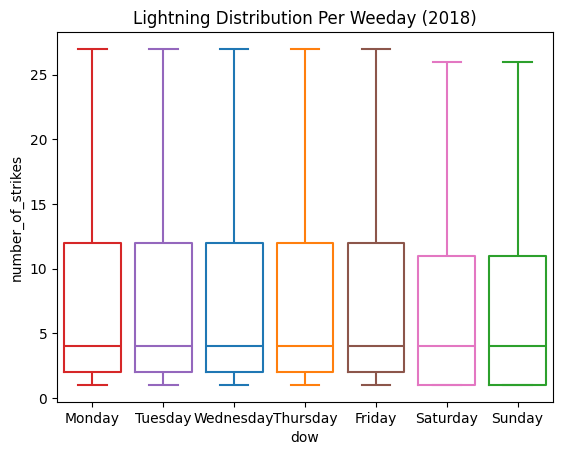

In [38]:
g = sns.boxplot(data = df,
              x = 'dow',
              y = 'number_of_strikes',
              hue='dow',
              fill = False,
              order = dow_order,
              showfliers = False,

              );
g.set_title('Lightning Distribution Per Weeday (2018)');

In [40]:
df2 = pd.read_csv("eda_structuring_with_python_dataset2.csv")

In [41]:
df2['date'] = pd.to_datetime(df2['date'])

In [43]:
df2.head(20)

,date,number_of_strikes,center_point_geom
0,2016-01-04,55,POINT(-83.2 21.1)
1,2016-01-04,33,POINT(-83.1 21.1)
2,2016-01-05,46,POINT(-77.5 22.1)
3,2016-01-05,28,POINT(-76.8 22.3)
4,2016-01-05,28,POINT(-77 22.1)
5,2016-01-05,30,POINT(-76.7 22.3)
6,2016-01-05,34,POINT(-76.8 22.4)
7,2016-01-06,31,POINT(-74.2 25.9)
8,2016-01-06,24,POINT(-76 22.9)
9,2016-01-06,25,POINT(-75.3 22.7)


In [45]:
#now we create a new DF, combining 2016 - 2017 data with 2018 data.
union_df = pd.concat([df.drop(['dow', 'week'], axis = 1 ), df2], ignore_index=True)
union_df.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


Keep in mind that normall you would just do, union_df = pd.concat(df,df2, ignore_index=True). However there are 2 columns that are not needed "dow" and "week".
hence why ([df.drop(['dow', 'week'], axis = 1 ) was added in. 

In [46]:
# now we can add 3 new columns. 
union_df['year'] = union_df.date.dt.year
union_df['month'] = union_df.date.dt.month
union_df['month_txt'] = union_df.date.dt.month_name()
union_df.head()

,date,number_of_strikes,center_point_geom,year,month,month_txt
0,2018-01-03,194,POINT(-75 27),2018,1,January
1,2018-01-03,41,POINT(-78.4 29),2018,1,January
2,2018-01-03,33,POINT(-73.9 27),2018,1,January
3,2018-01-03,38,POINT(-73.8 27),2018,1,January
4,2018-01-03,92,POINT(-79 28),2018,1,January


In [47]:
union_df[['year','number_of_strikes']].groupby(by = ['year']).sum()

,number_of_strikes
year,
2016,41582229
2017,35095195
2018,44600989


In [50]:
#now we do it by month
lightning_by_month = union_df.groupby(['month_txt', 'year']).agg(
    number_of_strikes = pd.NamedAgg(column='number_of_strikes',aggfunc=sum)
).reset_index()

lightning_by_month.head()

C:\Users\Adewole\AppData\Local\Temp\ipykernel_11180\253656981.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  lightning_by_month = union_df.groupby(['month_txt', 'year']).agg(


,month_txt,year,number_of_strikes
0,April,2016,2636427
1,April,2017,3819075
2,April,2018,1524339
3,August,2016,7250442
4,August,2017,6021702


In [54]:
lightning_by_year = union_df.groupby(['year']).agg(
    year_of_strikes = pd.NamedAgg(column='number_of_strikes',aggfunc=sum)
).reset_index()

lightning_by_year.head()

C:\Users\Adewole\AppData\Local\Temp\ipykernel_11180\3828796865.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  lightning_by_year = union_df.groupby(['year']).agg(


,year,year_of_strikes
0,2016,41582229
1,2017,35095195
2,2018,44600989


In [55]:
percentage_lightning = lightning_by_month.merge(lightning_by_year,on='year')
percentage_lightning.head()

,month_txt,year,number_of_strikes,year_of_strikes
0,April,2016,2636427,41582229
1,April,2017,3819075,35095195
2,April,2018,1524339,44600989
3,August,2016,7250442,41582229
4,August,2017,6021702,35095195


In [57]:
percentage_lightning['percentage_lightning_per_month'] = (percentage_lightning.number_of_strikes/
                                                          percentage_lightning.year_of_strikes * 100.0)
percentage_lightning.head()


,month_txt,year,number_of_strikes,year_of_strikes,percentage_lightning_per_month
0,April,2016,2636427,41582229,6.340273
1,April,2017,3819075,35095195,10.882045
2,April,2018,1524339,44600989,3.417725
3,August,2016,7250442,41582229,17.436396
4,August,2017,6021702,35095195,17.158195


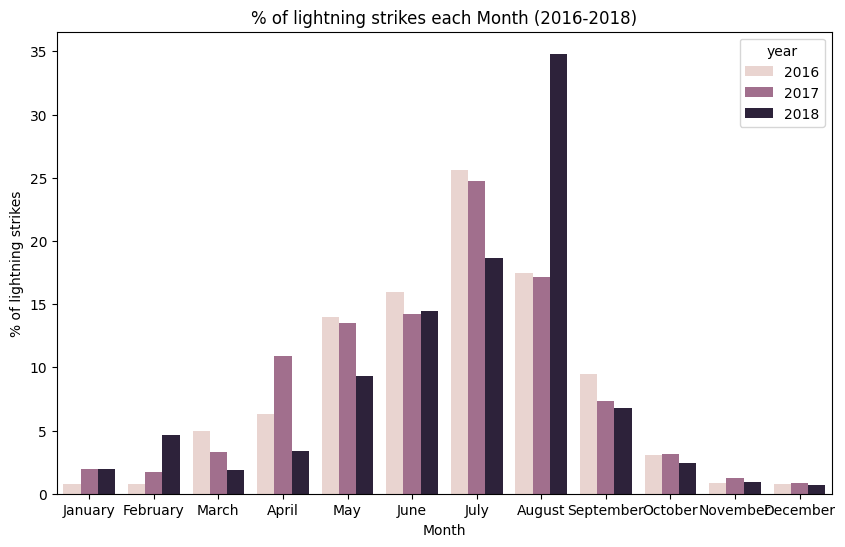

In [58]:
plt.figure(figsize=(10,6));

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

sns.barplot(
    data = percentage_lightning,
    x = 'month_txt',
    y = 'percentage_lightning_per_month',
    hue = 'year',
    order = month_order );
plt.xlabel("Month");
plt.ylabel("% of lightning strikes");
plt.title("% of lightning strikes each Month (2016-2018)");